In [1]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data Files/Raw Data/users_ratings.csv')
df.head(5)

,UserID,Title,Year,Description,Directors,Stars,Viewer_Advisory,Duration,Genre,Votes,Movie_Rating,User_Rating
0,ur117926588,A Nightmare on Elm Street 2: Freddy's Revenge,1985,A teenage boy is haunted in his dreams by dece...,['Jack Sholder'],"['Robert Englund', 'Mark Patton', 'Kim Myers',...",R,1 hr 27 min,Horror,72454.0,5.4,5
1,ur117926588,Elvis,2022,The life of American music icon,['Baz Luhrmann'],"['Tom Hanks', 'Austin Butler', 'Olivia DeJonge...",PG-13,2 hr 39 min,"Biography, Drama, Music",196677.0,7.3,8
2,ur117926588,Where Eagles Dare,1968,Allied agents stage a daring raid on a castle ...,['Brian G. Hutton'],"['Richard Burton', 'Clint Eastwood', 'Mary Ure...",M,2 hr 38 min,"Action, Adventure, War",59856.0,7.6,9
3,ur117926588,A Nightmare on Elm Street,1984,Teenager Nancy Thompson must uncover the dark ...,['Wes Craven'],"['Heather Langenkamp', 'Johnny Depp', 'Robert ...",R,1 hr 31 min,Horror,245805.0,7.4,9
4,ur117926588,Eagle Eye,2008,Jerry and Rachel are two strangers thrown toge...,['D.J. Caruso'],"['Shia LaBeouf', 'Michelle Monaghan', 'Rosario...",PG-13,1 hr 58 min,"Action, Mystery, Thriller",189895.0,6.6,5


# Exploratory Data Analysis

In [3]:
print("Data has " + str(df.shape[0]) + " observations and " + str(df.shape[1]) + " columns")

Data has 15595 observations and 12 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15595 entries, 0 to 15594
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UserID           15595 non-null  object 
 1   Title            15595 non-null  object 
 2   Year             15595 non-null  object 
 3   Description      15536 non-null  object 
 4   Directors        14845 non-null  object 
 5   Stars            15547 non-null  object 
 6   Viewer_Advisory  15235 non-null  object 
 7   Duration         15486 non-null  object 
 8   Genre            15595 non-null  object 
 9   Votes            15593 non-null  float64
 10  Movie_Rating     15595 non-null  float64
 11  User_Rating      15595 non-null  int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 1.4+ MB


In [5]:
df.columns

Index(['UserID', 'Title', 'Year', 'Description', 'Directors', 'Stars',
       'Viewer_Advisory', 'Duration', 'Genre', 'Votes', 'Movie_Rating',
       'User_Rating'],
      dtype='object')

In [6]:
df.describe()

,Votes,Movie_Rating,User_Rating
count,1.559300e+04,15595.000000,15595.000000
mean,1.390420e+05,7.044053,6.962616
std,2.473490e+05,0.997410,1.860762
min,6.000000e+00,1.300000,0.000000
25%,5.917000e+03,6.500000,6.000000
50%,3.986400e+04,7.100000,7.000000
75%,1.610990e+05,7.700000,8.000000
max,2.716723e+06,10.000000,10.000000


In [7]:
# create boolean mask of NaN values
nan_mask = df.isna()

# count number of True values in each column
nan_count = nan_mask.sum(axis=0)

# print number of NaN values in each column
print(nan_count/len(df))

UserID             0.000000
Title              0.000000
Year               0.000000
Description        0.003783
Directors          0.048092
Stars              0.003078
Viewer_Advisory    0.023084
Duration           0.006989
Genre              0.000000
Votes              0.000128
Movie_Rating       0.000000
User_Rating        0.000000
dtype: float64


### Distribution of User Ratings

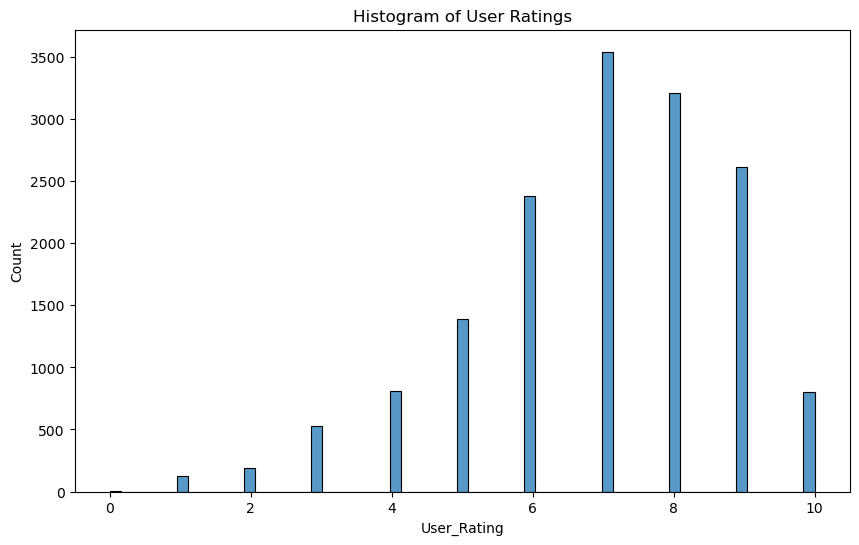

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='User_Rating')
plt.title('Histogram of User Ratings')
plt.show()

### Correlation between Numerical Columns

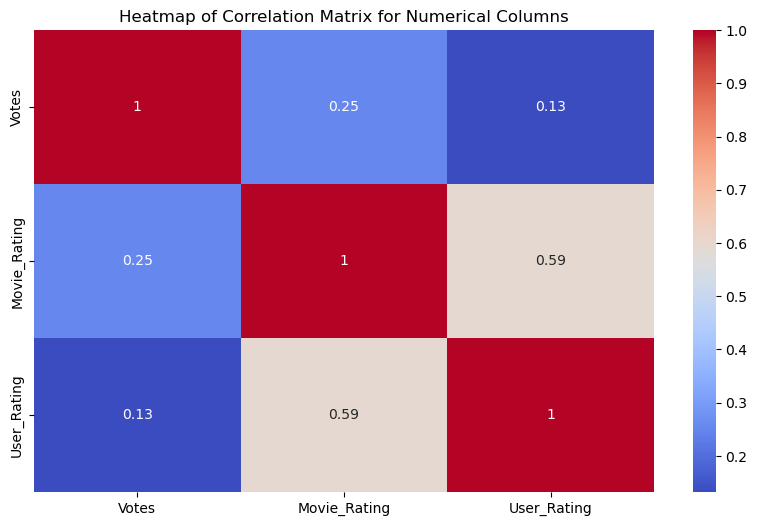

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
numerical_columns = ['Year', 'Duration', 'Votes', 'Movie_Rating', 'User_Rating']
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix for Numerical Columns')
plt.show()

### Movie Ratings vs. User Ratings: A Comparative Analysis by UserID

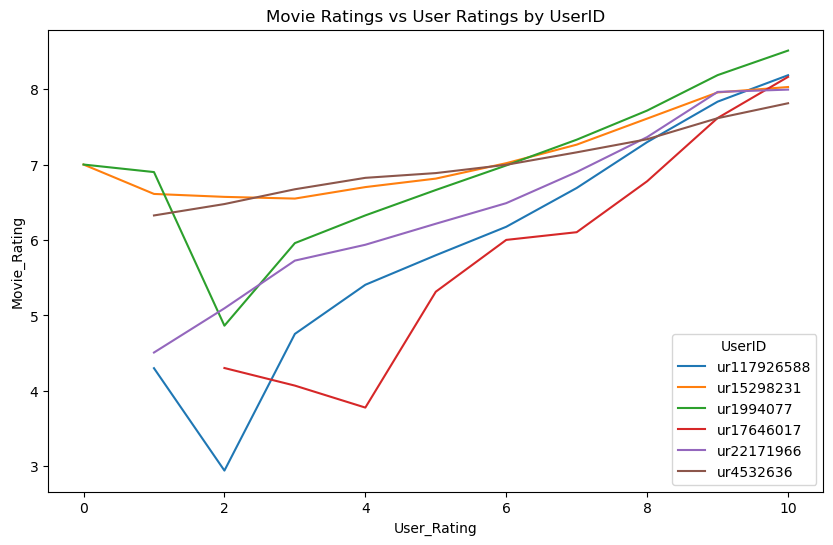

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data = df, y = 'Movie_Rating', x = 'User_Rating', hue = 'UserID', ci=None)
plt.title('Movie Ratings vs User Ratings by UserID')
plt.show()

# when movies are rated below 5, users tend to rate them lower than the average rating
# when movies are rated above 5, users tend to rate them higher than the average rating

### Average User Ratings by Decade for Different Users

In [11]:
df_decades = df[['Year', 'User_Rating', 'UserID']].copy()
df_decades['Year'] = df_decades['Year'].str.replace('–', '-').str.split('-').str[0]
df_decades['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df_decades['Decade'] = (df_decades['Year'] // 10) * 10
df_decades = df_decades.groupby(['UserID', 'Decade'])['User_Rating'].mean().reset_index()

df_decades['Decade'] = pd.to_datetime(df_decades['Decade'], format='%Y')
df_decades = df_decades.set_index('Decade')
df_decades = df_decades.reset_index()
df_decades.head()

,Decade,UserID,User_Rating
0,1920-01-01,ur117926588,9.000000
1,1930-01-01,ur117926588,8.250000
2,1940-01-01,ur117926588,7.966667
3,1950-01-01,ur117926588,7.800000
4,1960-01-01,ur117926588,7.159420


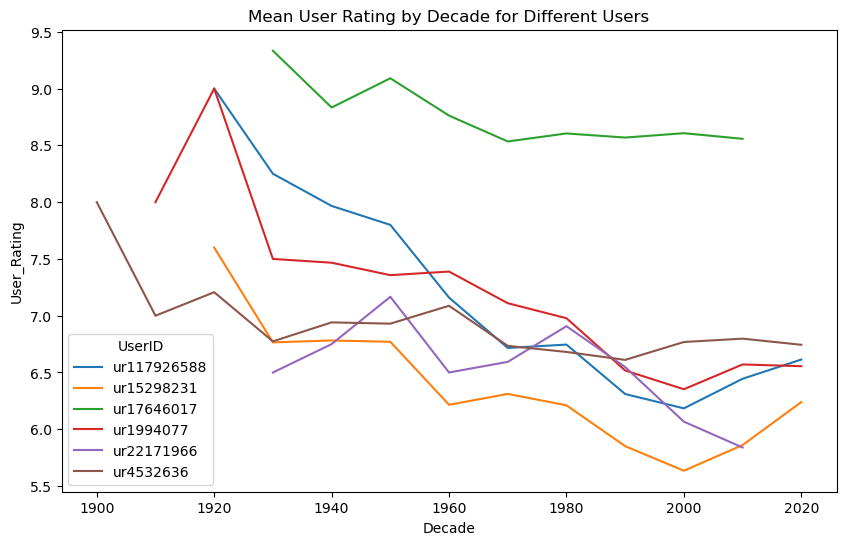

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_decades, x='Decade', y='User_Rating', hue = 'UserID', ci=None)
plt.title('Mean User Rating by Decade for Different Users')
plt.show()

# decrease in average user ratings over time

### User Ratings by User ID

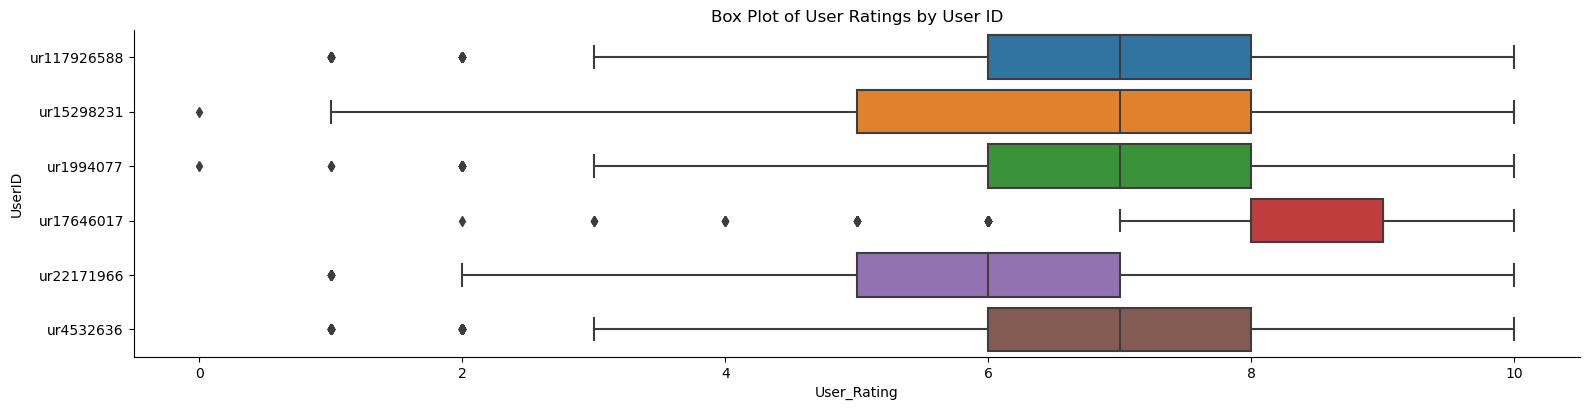

In [13]:
sns.catplot(data=df, x='User_Rating', y='UserID', kind='box', height=4, aspect=4)
plt.title('Box Plot of User Ratings by User ID')
plt.show()

### Number of Movies and Average User Ratings by Viewer Advisory

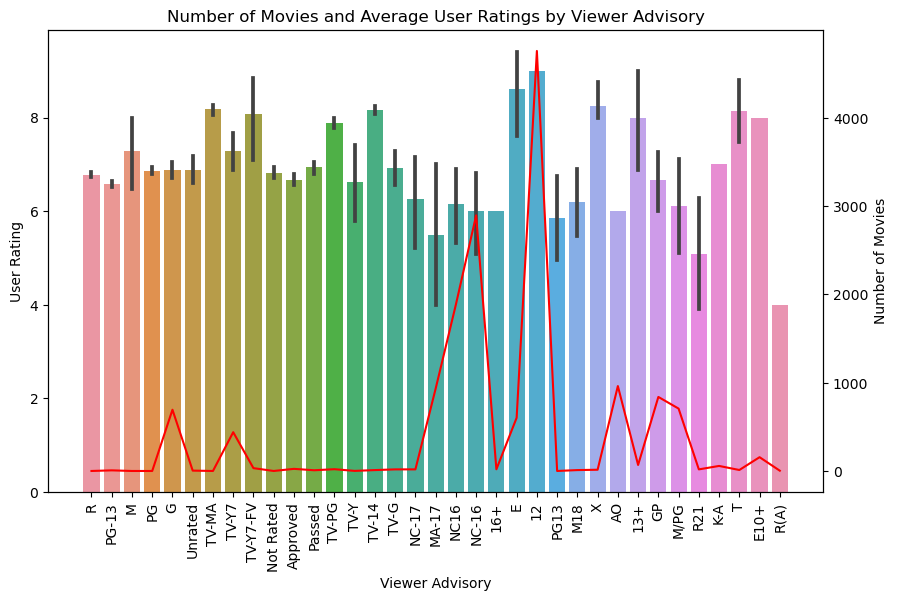

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df, x='Viewer_Advisory', y='User_Rating', ax=ax)
ax2 = ax.twinx()

sns.lineplot(data=df.groupby('Viewer_Advisory')['Title'].count().reset_index(),
             x='Viewer_Advisory', y='Title', ax=ax2, color='red')

ax.set_ylabel('User Rating')
ax2.set_ylabel('Number of Movies')
ax.set_xlabel('Viewer Advisory')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Number of Movies and Average User Ratings by Viewer Advisory')
plt.show()

### Pie chart of Movie Ratings

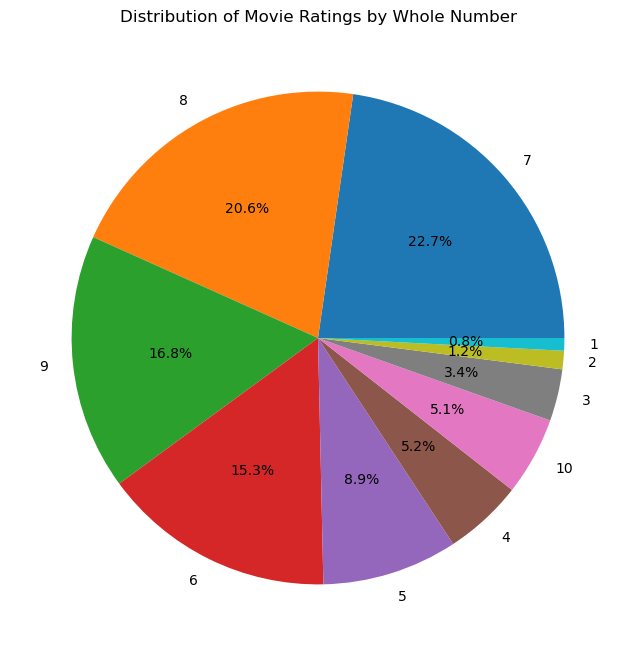

In [15]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df['rating_group'] = pd.cut(df['User_Rating'], bins=bins, labels=range(1, 11))
rating_counts = df['rating_group'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Movie Ratings by Whole Number')
plt.show()